BMW 320i<br/>
parameters_vehicle2<br/>
single-track model: init_ST<br/>
env：phd<br/>
aim: model import/text

https://gitlab.lrz.de/tum-cps/commonroad-vehicle-models/-/blob/master/PYTHON/vehiclemodels/vehicle_dynamics_st.py

In [2]:
from scipy.integrate import odeint
import numpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import title, legend
import math

from vehiclemodels.parameters_vehicle2 import parameters_vehicle2
from vehiclemodels.init_st import init_st
from vehiclemodels.vehicle_dynamics_st import vehicle_dynamics_st

In [12]:
def func_ST(x, t, u, p):
    f = vehicle_dynamics_st(x, u, p)
    return f

In [4]:
# load parameters
p = parameters_vehicle2()
g = 9.81  # [m/s^2]

# set options --------------------------------------------------------------
tStart = 0  # start time
tFinal = 1  # start time

delta0 = 0
vel0 = 15
Psi0 = 0
dotPsi0 = 0
beta0 = 0
sy0 = 0
initialState = [0, sy0, delta0, vel0, Psi0, dotPsi0, beta0]  # initial state for simulation
x0_ST = init_st(initialState)  # initial state for single-track model

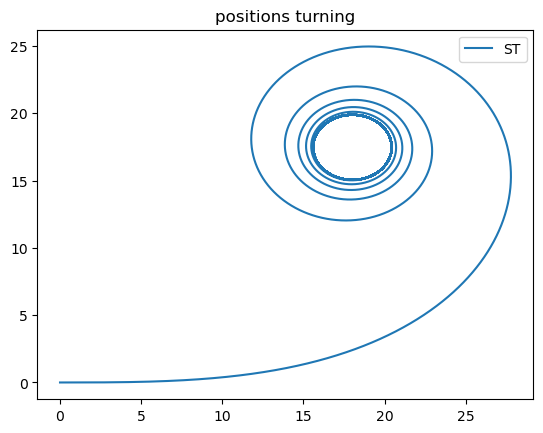

[ 0.  0.  0. 15.  0.  0.  0.] [1.50000000e-02 2.55600386e-09 1.00000000e-04 1.50000000e+01
 1.80333704e-09 4.15899069e-06 3.91195611e-07]


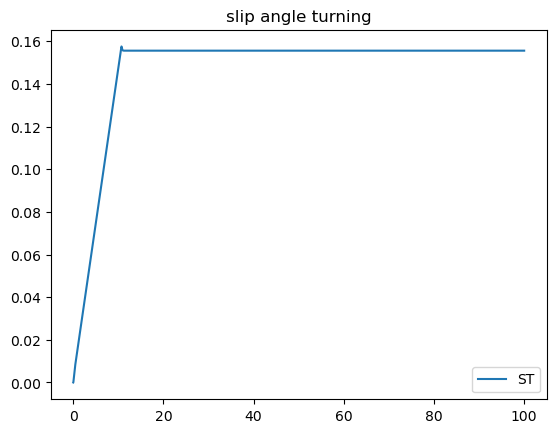

In [13]:
def cornering_left(v_delta, a_long):
    # steering to left
    t = numpy.arange(0, 100, 0.001)
    u = [v_delta, a_long]

    # simulate single-track model
    x_left_st = odeint(func_ST, x0_ST, t, args=(u, p))

    
    # results
    # position
    title('positions turning')
    plt.plot([tmp[0] for tmp in x_left_st], [tmp[1] for tmp in x_left_st])
    legend(['ST'])
    plt.autoscale()
    plt.show()
    
    print(x_left_st[0],x_left_st[1])

    # slip angle
    title('slip angle turning')
    plt.plot(t, [tmp[6] for tmp in x_left_st])
    legend(['ST'])
    plt.show()

cornering_left(0.1,0)

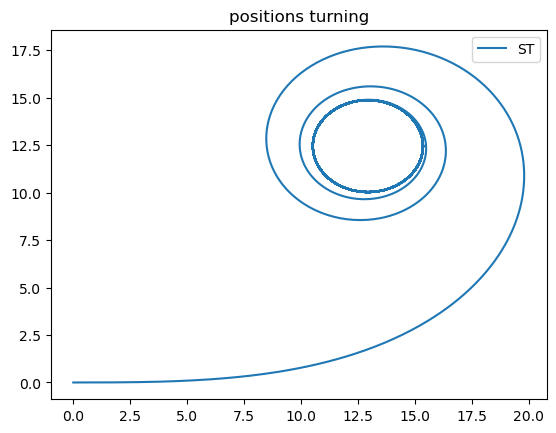

[ 0.  0.  0. 15.  0.  0.  0.] [1.50000000e-01 3.81821694e-06 2.00000000e-03 1.50000000e+01
 2.69151917e-06 7.98256877e-04 7.28430663e-05]


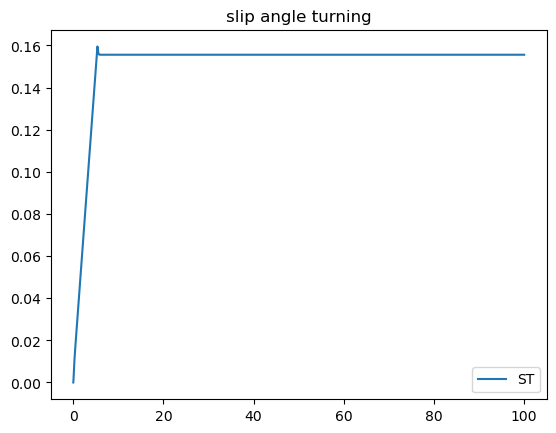

In [11]:
cornering_left(0.2,0)

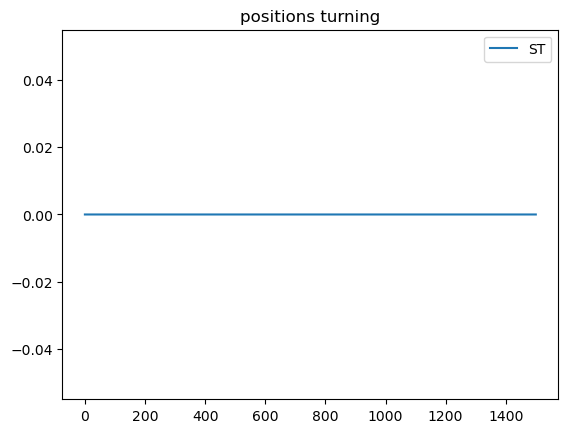

[ 0.  0.  0. 15.  0.  0.  0.] [ 0.15  0.    0.   15.    0.    0.    0.  ]


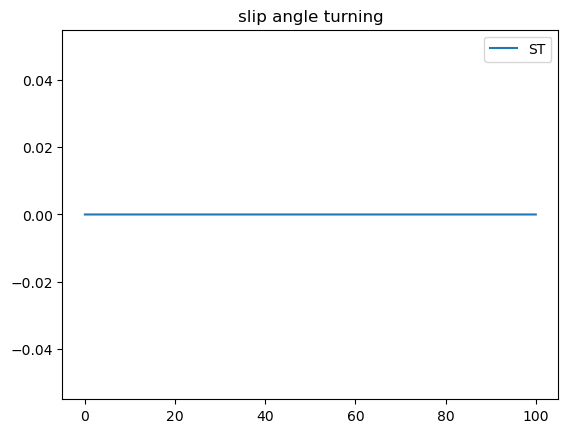

In [7]:
cornering_left(0,0)